In [1]:
import rootpath
import sys
import os
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [2]:
from testsuite.utilities import Pareto_split
from testsuite.optimisers import Saf
from testsuite.surrogates import GP, MultiSurrogate

In [3]:
import matplotlib
matplotlib.rcParams['font.size'] = 15 ;
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 8)

In [4]:
SCRIPT_DIR = os.getcwd()
def save_fig(fig, name=None):
    savedirs = [os.path.join(SCRIPT_DIR, "figures/"), '/home/finley/phd/papers/SAF-driven-EMO/presentation/SAF-EMO_presentation/figures']
    for d in savedirs:
        fig.savefig(os.path.join(d, name+".png"), dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait', pad_inches=0.12)
        fig.savefig(os.path.join(d, name+".pdf"), bbox_inches = 'tight', pad_inches = 0, dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait')

In [5]:
def image_infill(opt, ax, front_value = 0., n_contours=20, uncertainty=0.1):
    #figure_properties
    ax.set_xlim([0., 1.5])
    ax.set_ylim([0., 1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0., 1.5, M)
    y = np.linspace(0., 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    xyw = opt.apply_weighting(xy)
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty*opt.obj_weights, invert=False) for xyi in xyw])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
#     fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    if front_value is not None:
        handles.append(front_legend)
        labels.append("{}".format(front_value))
#     ax.legend(handles, labels)

In [6]:
seed = 1
INVERT = True
plt.rcParams['image.cmap'] = 'viridis'
from matplotlib.cm import viridis as cmap
n_contours=20

In [7]:
from testsuite.optimisers import Saf, Mpoi, SmsEgo
saf_opt = Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
mpoi_opt = Mpoi(objective_function=lambda x: x[0:2],  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
smsego_opt = SmsEgo(objective_function=lambda x: x[0:2], limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)

In [8]:
x_ = np.array([0.42, 0.215])
stds = [0.005, 0.01]

 <ipython-input-10-7f64d9b57642>:17: MatplotlibDeprecationWarning:shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


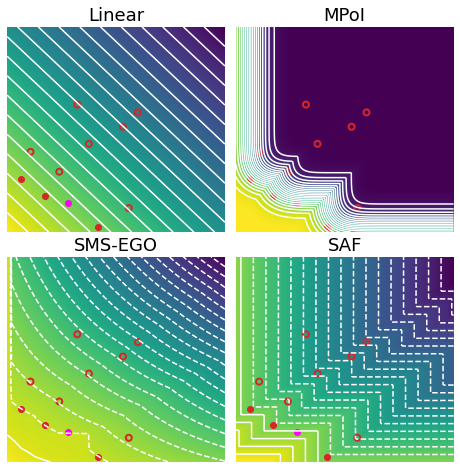

In [10]:
fig = plt.figure(figsize=[8,8])
gs = GridSpec(2,2, wspace=0.05, hspace=0.12)              # gridspec defines a grid layout of the figure
ax0 = fig.add_subplot(gs[0, 0])           
ax1 = fig.add_subplot(gs[1, 0]) 
ax2 = fig.add_subplot(gs[0, 1])           
ax3 = fig.add_subplot(gs[1, 1]) 
for ax in fig.axes:
    ax.axis('off')

# compute infill
M, N = 200, 200
x = np.linspace(0., 1.5, M)
y = np.linspace(0., 1.5, N)
xx, yy = np.meshgrid(x, y)
xy = np.vstack((xx.flat, yy.flat)).T
zz = 3-(xx+yy)
pcol = ax0.pcolor(xx, yy, zz)
levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
ax0.contour(xx, yy, zz, colors="white", levels=levels)
ax0.scatter(saf_opt.d[:,0], saf_opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
ax0.scatter(saf_opt.p[:,0], saf_opt.p[:,1], c="C3", label="non-dominated samples")
ax0.scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")

image_infill(smsego_opt, ax1, n_contours=n_contours, front_value=None)
image_infill(mpoi_opt, ax2, n_contours=n_contours, front_value=None)
image_infill(saf_opt, ax3, n_contours=n_contours, front_value=None)


ax1.scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")
ax2.scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")
ax3.scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")

ax0.set_title("Linear")
ax1.set_title("SMS-EGO")
ax2.set_title("MPoI")
ax3.set_title("SAF")
save_fig(fig, name="figure50_infill_comparrisson")